# **Binary image processing**

# **Basic operations**

## Dilation
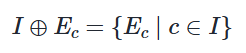

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology

In [ ]:
# Step 1: Define the binary image (I)
binary_image = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 0, 0],
    [1, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
], dtype=np.uint8)

In [ ]:
# Step 2: Define the structuring element (E_c)
structuring_element = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0],
], dtype=np.uint8)

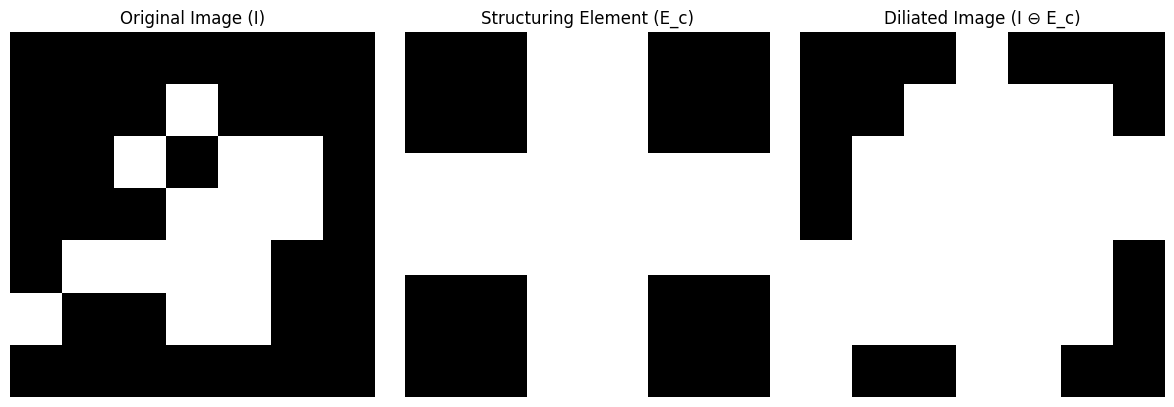

In [ ]:
# Step 3: Perform dilation
Diliated_image = morphology.dilation(binary_image, structuring_element)

# Step 5: Visualize the results
plt.figure(figsize=(12, 4))

# Original binary image
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray', vmin=0, vmax=1)
plt.title('Original Image (I)')
plt.axis('off')

# Structuring element visualization (optional)
plt.subplot(1, 3, 2)
plt.imshow(structuring_element, cmap='gray', vmin=0, vmax=1)
plt.title('Structuring Element (E_c)')
plt.axis('off')

# Diliated image
plt.subplot(1, 3, 3)
plt.imshow(Diliated_image, cmap='gray', vmin=0, vmax=1)
plt.title('Diliated Image (I ⊖ E_c)')
plt.axis('off')

plt.tight_layout()
plt.show()


## Erosion (Code for showing how to do Erosion.)
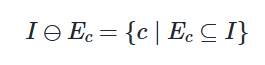

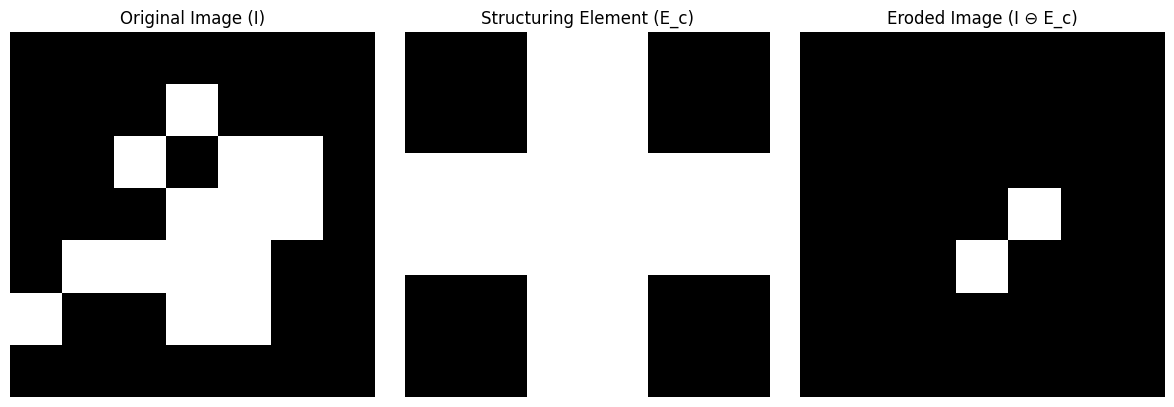

In [ ]:
# Step 3: Perform erosion
eroded_image = morphology.erosion(binary_image, structuring_element)

# Step 5: Visualize the results
plt.figure(figsize=(12, 4))

# Original binary image
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray', vmin=0, vmax=1)
plt.title('Original Image (I)')
plt.axis('off')

# Structuring element visualization (optional)
plt.subplot(1, 3, 2)
plt.imshow(structuring_element, cmap='gray', vmin=0, vmax=1)
plt.title('Structuring Element (E_c)')
plt.axis('off')

# Eroded image
plt.subplot(1, 3, 3)
plt.imshow(eroded_image, cmap='gray', vmin=0, vmax=1)
plt.title('Eroded Image (I ⊖ E_c)')
plt.axis('off')

plt.tight_layout()
plt.show()


## Duality
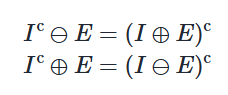

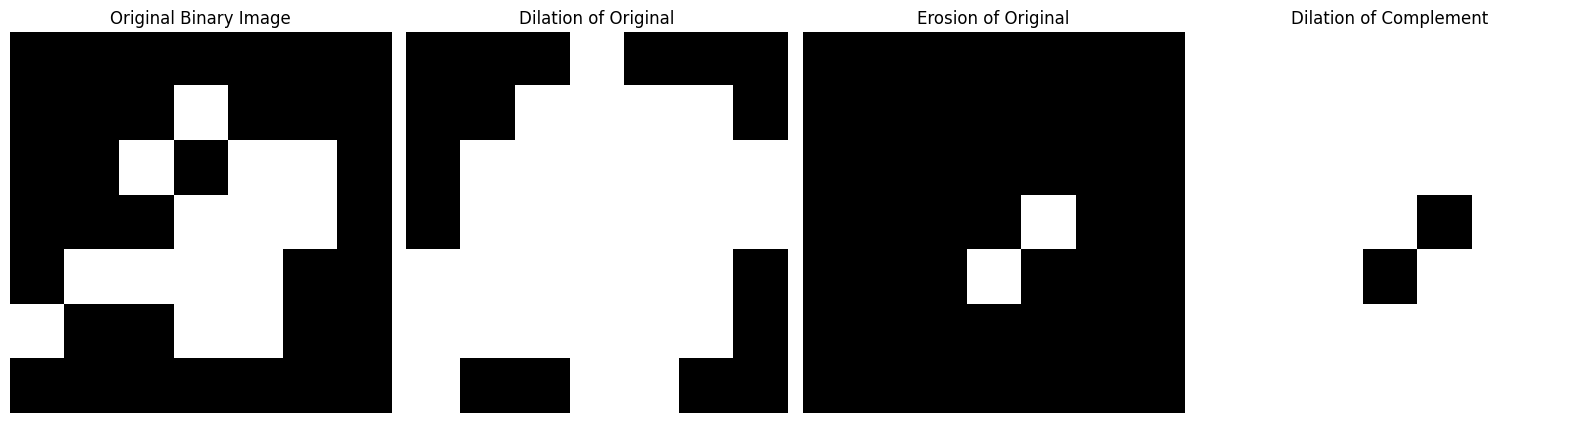

In [ ]:
# Step 3: Compute the complement of the binary image
complement_image = np.logical_not(binary_image)

# Step 4: Perform Dilation and Erosion on the original and complement
dilated_complement = morphology.dilation(complement_image, structuring_element)
eroded_complement = morphology.erosion(complement_image, structuring_element)

# Step 5: Visualize the results
fig, ax = plt.subplots(1, 4, figsize=(16, 6))

# Original Binary Image
ax[0].imshow(binary_image, cmap='gray')
ax[0].set_title("Original Binary Image")
ax[0].axis('off')

# Dilation of the original
ax[1].imshow(morphology.dilation(binary_image, structuring_element), cmap='gray')
ax[1].set_title("Dilation of Original")
ax[1].axis('off')

# Erosion of the original
ax[2].imshow(morphology.erosion(binary_image, structuring_element), cmap='gray')
ax[2].set_title("Erosion of Original")
ax[2].axis('off')

# Dilation of the complement (should be the same as erosion of original)
ax[3].imshow(dilated_complement, cmap='gray')
ax[3].set_title("Dilation of Complement")
ax[3].axis('off')

plt.tight_layout()
plt.show()


# **Composition of basic operators**

## Opening
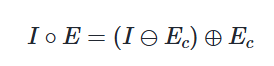

## Closing
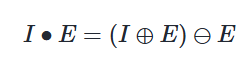

In [ ]:
#Key data
!gdown 1AuPDhJ15OC72g1Pv13bmxFdaNqliZgRP

Downloading...
From: https://drive.google.com/uc?id=1AuPDhJ15OC72g1Pv13bmxFdaNqliZgRP
To: /content/key.png
100% 3.31k/3.31k [00:00<00:00, 11.5MB/s]


In [ ]:
from skimage import io
image_path = '/content/key.png'
image_gray = io.imread(image_path, as_gray=True)

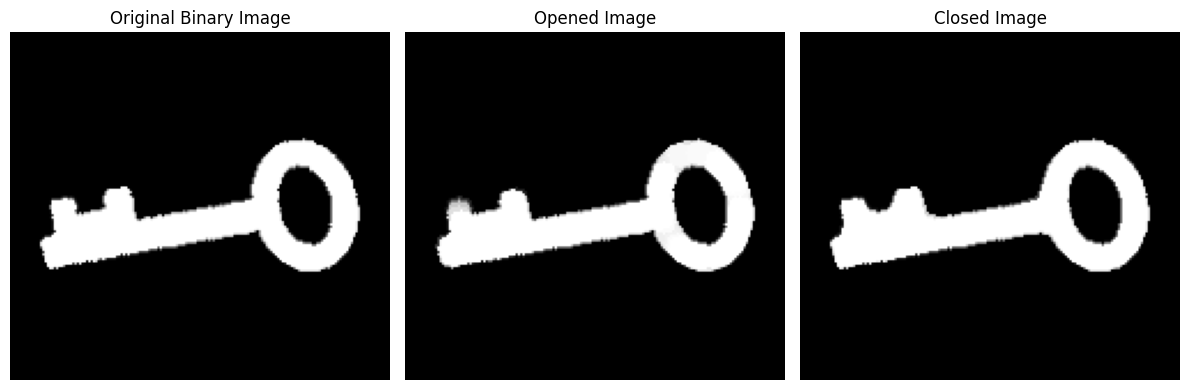

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology

# Step 2: Define a structuring element (e.g., a disk shape)
selem = morphology.disk(5)  # Structuring element of radius 5

# Step 3: Perform Opening (erosion followed by dilation)
opened_image = morphology.opening(image_gray, selem)

# Step 4: Perform Closing (dilation followed by erosion)
closed_image = morphology.closing(image_gray, selem)

# Step 5: Visualize the results
fig, ax = plt.subplots(1, 3, figsize=(12, 6))

# Original Binary Image
ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title("Original Binary Image")
ax[0].axis('off')

# Opened Image
ax[1].imshow(opened_image, cmap='gray')
ax[1].set_title("Opened Image")
ax[1].axis('off')

# Closed Image
ax[2].imshow(closed_image, cmap='gray')
ax[2].set_title("Closed Image")
ax[2].axis('off')

plt.tight_layout()
plt.show()


# **Application**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology
from skimage import measure
from skimage.draw import disk

## Top-hat transform

In [ ]:
# Top-Hat Transform
selem = np.ones((5, 5), dtype=np.uint8)
top_hat = morphology.white_tophat(image_gray, selem)

## Granulometry

In [ ]:
# Granulometry (size distribution analysis)
# Apply morphological opening with different structuring elements (sizes)
granulometry = []
for size in range(1, 15):
    selem = np.ones((size, size), dtype=np.uint8)
    opened_image = morphology.opening(image_gray, selem)
    granulometry.append(np.sum(opened_image))

## Hit-or-miss transform

In [ ]:
# Hit-or-Miss Transform
# Define structuring elements for hit-or-miss
selem_fg = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]], dtype=np.uint8)
selem_bg = np.ones((3, 3), dtype=np.uint8)
  # Step 4.1: Erosion for foreground (1's) and background (0's)
erosion_fg = morphology.erosion(image_gray, selem_fg)
erosion_bg = morphology.erosion(1 - image_gray, selem_bg)
  # Step 4.2: Perform the Hit-or-Miss by intersecting both
#hit_or_miss = erosion_fg & erosion_bg
hit_or_miss = np.bitwise_and(erosion_fg.astype(np.uint8),erosion_bg.astype(np.uint8))
#hit_or_miss = morphology.hit_or_miss(binary_image, selem_fg)

## Skeleton

In [ ]:
# Skeletonization
skeleton = morphology.skeletonize(image_gray)

## Show all visualized result

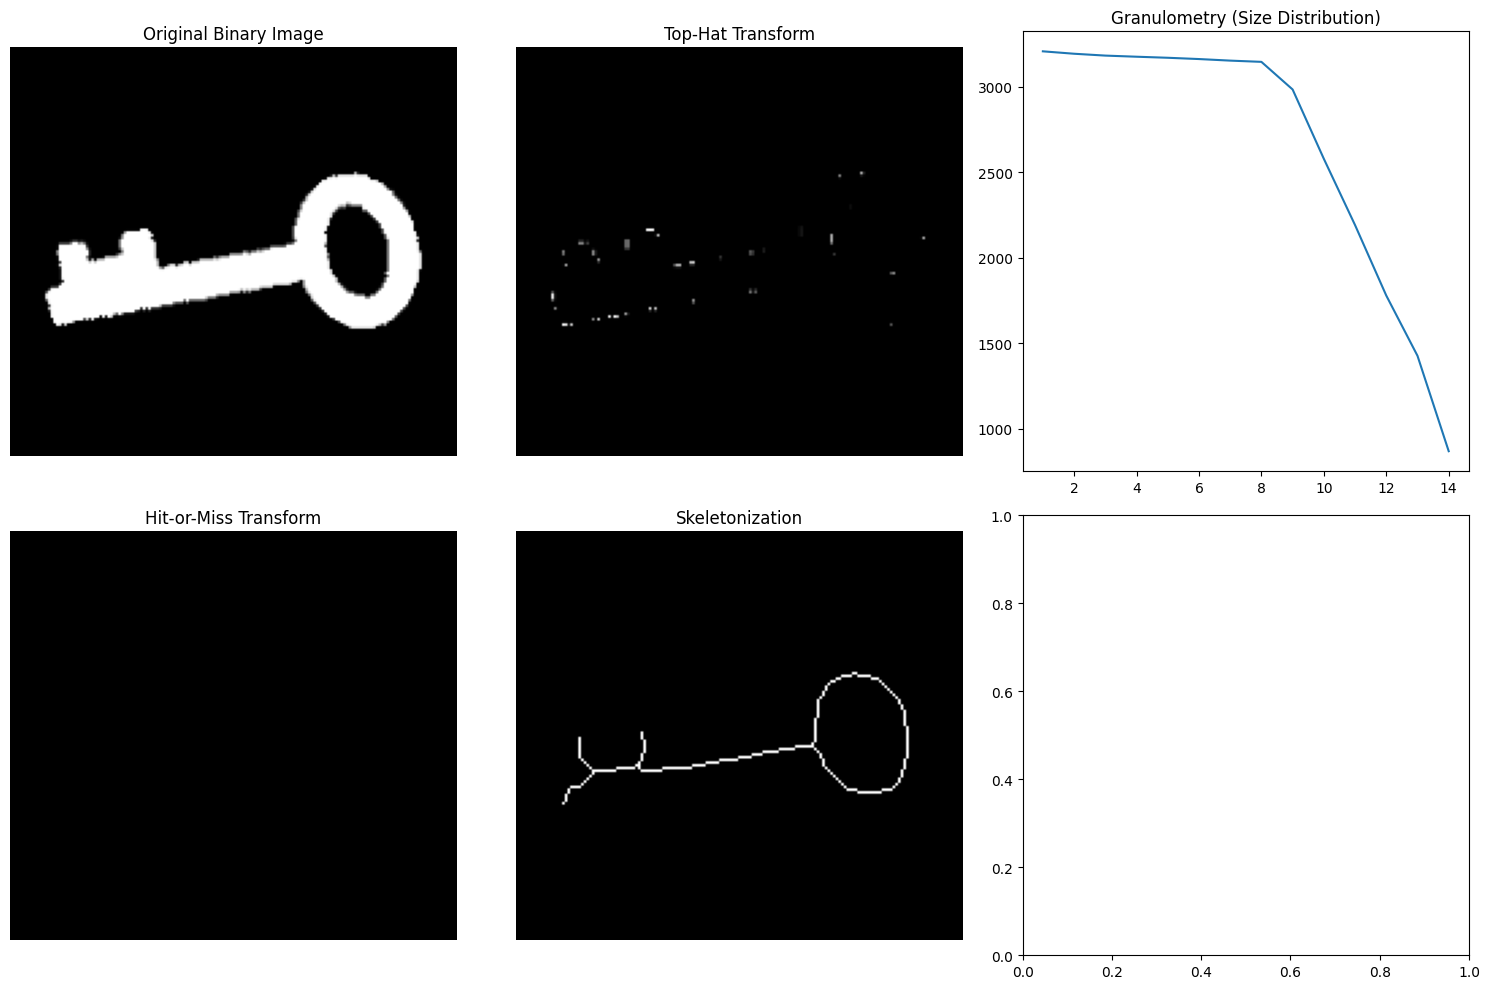

In [ ]:
# Visualize results
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# Original Image
ax[0, 0].imshow(image_gray, cmap='gray')
ax[0, 0].set_title("Original Binary Image")
ax[0, 0].axis('off')

# Top-Hat Transform
ax[0, 1].imshow(top_hat, cmap='gray')
ax[0, 1].set_title("Top-Hat Transform")
ax[0, 1].axis('off')

# Granulometry (Size Distribution Plot)
ax[0, 2].plot(range(1, 15), granulometry)
ax[0, 2].set_title("Granulometry (Size Distribution)")

# Hit-or-Miss Transform
ax[1, 0].imshow(hit_or_miss, cmap='gray')
ax[1, 0].set_title("Hit-or-Miss Transform")
ax[1, 0].axis('off')

# Skeletonization
ax[1, 1].imshow(skeleton, cmap='gray')
ax[1, 1].set_title("Skeletonization")
ax[1, 1].axis('off')

plt.tight_layout()
plt.show()

# **Measure**

## Area

In [ ]:
#Bomb data
!gdown 14Deb2M1xd-CyUFtdvz-KnRUiH-K9C09k

Downloading...
From: https://drive.google.com/uc?id=14Deb2M1xd-CyUFtdvz-KnRUiH-K9C09k
To: /content/bomb.png
100% 5.95k/5.95k [00:00<00:00, 18.9MB/s]


In [ ]:
from skimage import io
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from skimage.measure import label, regionprops, find_contours
import cv2

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# Step 1 : import new image
from skimage import io
image_path = '/content/bomb.png'
image_bomb = io.imread(image_path, as_gray=True)

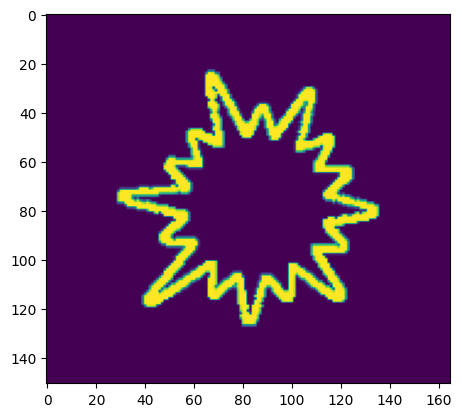

In [ ]:
plt.imshow(image_bomb)

Largest area is  =  1493.0


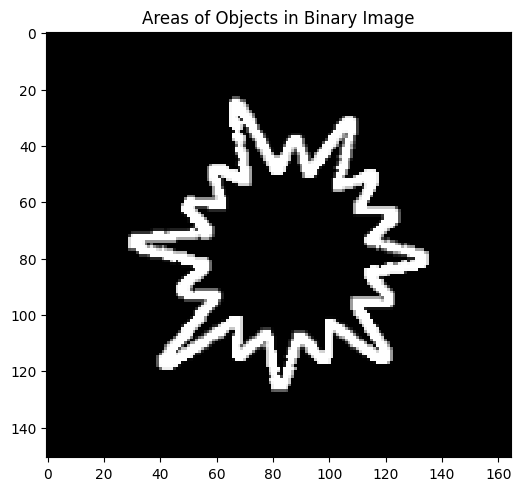

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops, centroid

# Step 2: Label connected regions in the binary image
labeled_image = label(image_bomb, connectivity=2)

# Step 3: Calculate region properties
regions = regionprops(labeled_image)

# Step 4: Visualize the image and display the area of each object
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image_bomb, cmap='gray', interpolation='none')
ax.set_title('Areas of Objects in Binary Image')

# Find the largest area
largest_area = max(region.area for region in regions)
print("Largest area is  = ",largest_area)


In [ ]:
# Step 2: Label connected regions in the binary image
labeled_image = label(image_bomb, connectivity=2)

# Step 3: Calculate region properties and display the area
regions = regionprops(labeled_image)

# Print the area of each region
print("Areas of objects:")
for i, region in enumerate(regions, start=1):
    print(f"Object {i}: Area = {region.area}")


Areas of objects:
Object 1: Area = 1493.0


## Bounding box

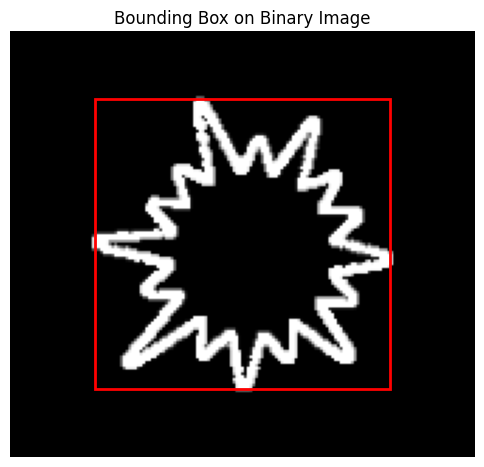

In [ ]:
# Step 4: Visualize the image and bounding boxes
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image_bomb, cmap='gray')
ax.set_title('Bounding Box on Binary Image')

for region in regions:
    # Get the bounding box coordinates (min_row, min_col, max_row, max_col)
    min_row, min_col, max_row, max_col = region.bbox

    # Correct starting position to (min_col, min_row)
    # Rectangle format: (x, y) for top-left corner, width, and height
    rect = plt.Rectangle(
        (min_col-0.5, min_row-0.5),  # Correct start position (x = min_col, y = min_row)
        max_col - min_col,  # Width
        max_row - min_row,  # Height
        edgecolor='red',
        facecolor='none',
        linewidth=2
    )
    ax.add_patch(rect)

plt.axis('off')
plt.show()


## Centroid

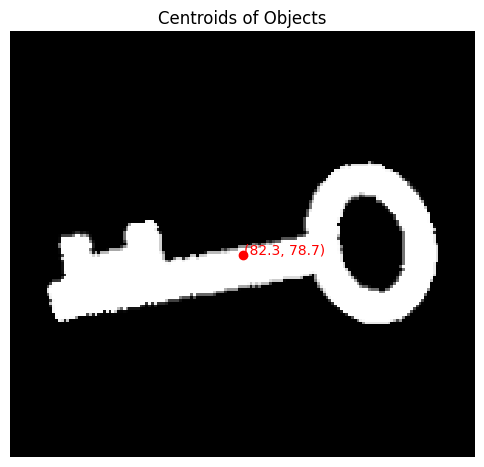

In [ ]:
from skimage.measure import centroid

# Step 4: Display the centroids
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image_gray, cmap='gray', interpolation='none')
ax.set_title('Centroids of Objects')

for region in regions:
    # Get the centroid of the region
    centroid_y, centroid_x = region.centroid

    # Mark the centroid on the image
    ax.plot(centroid_x, centroid_y, 'ro')  # 'ro' means red circle
    ax.text(centroid_x+0.3 , centroid_y, f'({centroid_x:.1f}, {centroid_y:.1f})',
            color='red', fontsize=10)

plt.axis('off')
plt.show()

## Eccentricity

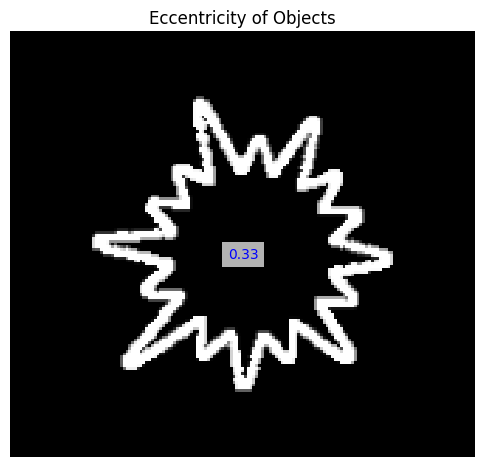

In [ ]:
# Step 4: Display eccentricity values
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image_bomb, cmap='gray', interpolation='none')
ax.set_title('Eccentricity of Objects')

for region in regions:
    # Get the centroid and eccentricity of the region
    centroid_y, centroid_x = region.centroid
    eccentricity = region.eccentricity

    # Annotate the eccentricity at the centroid of the object
    ax.text(
        centroid_x, centroid_y, f'{eccentricity:.2f}',
        color='blue', fontsize=10, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
    )

plt.axis('off')
plt.show()


## Solidity

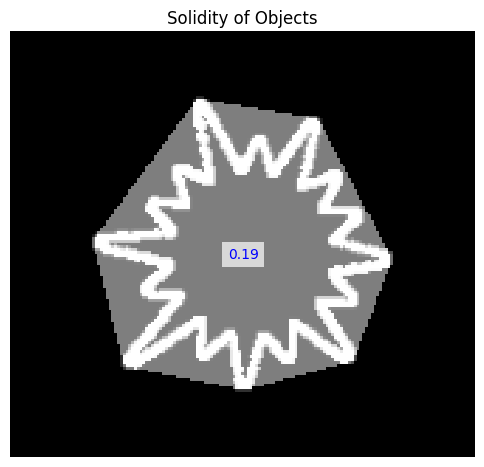

Solidity is =  0.1880352644836272


In [ ]:
from skimage.morphology import convex_hull_image

# Step 4.1: Compute the convex hull of the labeled regions
convex_hull = convex_hull_image(image_bomb)

# Step 4.2: Display solidity values
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image_bomb, cmap='gray', interpolation='none')
ax.set_title('Solidity of Objects')

for region in regions:
    # Get the centroid and solidity of the region
    centroid_y, centroid_x = region.centroid
    solidity = region.solidity

    # Annotate the solidity value on the image
    ax.text(
        centroid_x, centroid_y, f'{solidity:.2f}',
        color='blue', fontsize=10, ha='center', va='center',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
    )
# Overlay the convex hull in gray
ax.imshow(convex_hull, cmap='gray', interpolation='none', alpha=0.5)
plt.axis('off')
plt.show()

print("Solidity is = ",solidity)